![](https://www.sportdiver.com/sites/sportdiver.com/files/styles/655_1x_/public/san-francisco-airport-activities-restaurants.jpg?itok=o00b1aOU&fc=50,50)

# ============San Francisco Airport traffic analysis=================

## Analyzed by MARCO LIN

#### San Fransico Airport is one of the significant airports in the world. San Mateo Country is considering an expansion to this airport. we are participating in a hackathon with their dataset of SFO to offer the most comprehensive solution that depicts the insights of the flights and provides recommendations. 
#### In this report, we will start by analyzing four aspects of data: GEO Region, Domestic and International Population Tendency, Type of Airplanes, and the Ranking of Landed Weight, in order to understand the data in general.
#### In addition, we will join various dataset to explore if there is any valuable data for our analysis. Especially, we will find out the "Elite" flights for the airport. The elite flights will be the flight which has higher number of landing count.
#### We will do logical segmentation to explain step by step. The end of report will come with summary and recommendations.

## 1.) =====================Preparation=========================

In [1]:
library(tidyverse)
options(scipen=999)
library(IRdisplay)

─ Attaching packages ──────────────────── tidyverse 1.2.1 ─
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
Airlines <- read.csv("~/project-ionic/R/week5/Airlines.csv")

In [3]:
countries <- read.csv("~/project-ionic/R/week5/Countries of the World.csv")

In [4]:
landings <- read.csv("~/project-ionic/R/week5/air-traffic-landings-statistics.csv")

In [5]:
passagers <- read.csv("~/project-ionic/R/week5/air-traffic-passenger-statistics.csv")

In [6]:
head (Airlines, 30)
names(Airlines)

Name,ICAO,IATA,CallSign,Country,Founded,Destinations,Fleet.Size
Air Vanuatu,AVN,NF,AIR VAN,Vanuatu,1981,33,6
Atlantic Airways,FLI,RC,FAROELINE,Faroe Islands,1987,9,5
Express.Net Airlines,XNA,,EXPRESSNET,,1972,NA,4
Sabah Air,SAX,SA,SABAH AIR,Malaysia,1975,NA,12
Air Vega,,,,,2012,NA,1
Corporate Flight Management,VTE,,VOLUNTEER,,1982,NA,27
ExpressJet,ASQ,EV,ACEY,,1979,194,401
Hageland Aviation Services,HAG,H6,HAGELAND,United States,1981,76,33
Jota Aviation,ENZ,,ENZO,,2009,NA,7
Links Air,LNQ,W2,FASTLINK,,1983,2,3


[1] "Name"         "ICAO"         "IATA"         "CallSign"     "Country"     
[6] "Founded"      "Destinations" "Fleet.Size"

In [7]:
head(countries)
names(countries)

Country,Region,Population,Area..sq..mi..,Pop..Density..per.sq..mi..,Coastline..coast.area.ratio.,Net.migration,Infant.mortality..per.1000.births.,GDP....per.capita.,Literacy....,Phones..per.1000.,Arable....,Crops....,Other....,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000,"97,0","259,5",10,15,75,2,"22,46","3,27",,,
Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",,,
Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900,"42,0","7,8","2,41","0,24","97,35",,"45,11","24,2","0,096","0,658","0,246"


[1] "Country"                            "Region"                            
 [3] "Population"                         "Area..sq..mi.."                    
 [5] "Pop..Density..per.sq..mi.."         "Coastline..coast.area.ratio."      
 [7] "Net.migration"                      "Infant.mortality..per.1000.births."
 [9] "GDP....per.capita."                 "Literacy...."                      
[11] "Phones..per.1000."                  "Arable...."                        
[13] "Crops...."                          "Other...."                         
[15] "Climate"                            "Birthrate"                         
[17] "Deathrate"                          "Agriculture"                       
[19] "Industry"                           "Service"

In [8]:
head (landings)
names(landings)
str(landings)

Activity.Period,Operating.Airline,Operating.Airline.IATA.Code,Published.Airline,Published.Airline.IATA.Code,GEO.Summary,GEO.Region,Landing.Aircraft.Type,Aircraft.Body.Type,Aircraft.Manufacturer,Aircraft.Model,Aircraft.Version,Landing.Count,Total.Landed.Weight
200204,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,83,16434000
200204,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,300,3,672000
200204,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Wide Body,Lockheed,L1011,0,27,9666000
200204,Aeroflot Russian International Airlines,,Aeroflot Russian International Airlines,,International,Europe,Passenger,Wide Body,Boeing,777,0,9,4139946
200204,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,Boeing,737,200,5,525000
200204,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,Boeing,737,,15,1605000


[1] "Activity.Period"             "Operating.Airline"          
 [3] "Operating.Airline.IATA.Code" "Published.Airline"          
 [5] "Published.Airline.IATA.Code" "GEO.Summary"                
 [7] "GEO.Region"                  "Landing.Aircraft.Type"      
 [9] "Aircraft.Body.Type"          "Aircraft.Manufacturer"      
[11] "Aircraft.Model"              "Aircraft.Version"           
[13] "Landing.Count"               "Total.Landed.Weight"

'data.frame':	21846 obs. of  14 variables:
 $ Activity.Period            : int  200204 200204 200204 200204 200204 200204 200204 200204 200204 200204 ...
 $ Operating.Airline          : Factor w/ 114 levels "ABC Aerolineas S.A. de C.V. dba Interjet",..: 26 26 26 4 7 7 7 7 7 7 ...
 $ Operating.Airline.IATA.Code: Factor w/ 100 levels "","2Q","4O","4T",..: 85 85 85 1 12 12 12 12 12 12 ...
 $ Published.Airline          : Factor w/ 103 levels "ABC Aerolineas S.A. de C.V. dba Interjet",..: 23 23 23 4 7 7 7 7 7 7 ...
 $ Published.Airline.IATA.Code: Factor w/ 91 levels "","2Q","4O","4T",..: 79 79 79 1 12 12 12 12 12 12 ...
 $ GEO.Summary                : Factor w/ 2 levels "Domestic","International": 1 1 1 2 2 2 2 2 2 2 ...
 $ GEO.Region                 : Factor w/ 10 levels "Asia","Australia / Oceania",..: 10 10 10 6 3 3 3 3 3 3 ...
 $ Landing.Aircraft.Type      : Factor w/ 3 levels "Combi","Freighter",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Aircraft.Body.Type         : Factor w/ 4 levels "Narrow Body

In [9]:
head(passagers,10)
names(passagers)
str(passagers)

Activity.Period,Operating.Airline,Operating.Airline.IATA.Code,Published.Airline,Published.Airline.IATA.Code,GEO.Summary,GEO.Region,Activity.Type.Code,Price.Category.Code,Terminal,Boarding.Area,Passenger.Count
200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090
200507,Air China,CA,Air China,CA,International,Asia,Deplaned,Other,International,G,6263
200507,Air China,CA,Air China,CA,International,Asia,Enplaned,Other,International,G,5500
200507,Air France,AF,Air France,AF,International,Europe,Deplaned,Other,International,A,12050
200507,Air France,AF,Air France,AF,International,Europe,Enplaned,Other,International,A,11638
200507,Air New Zealand,NZ,Air New Zealand,NZ,International,Australia / Oceania,Deplaned,Other,International,G,4998


[1] "Activity.Period"             "Operating.Airline"          
 [3] "Operating.Airline.IATA.Code" "Published.Airline"          
 [5] "Published.Airline.IATA.Code" "GEO.Summary"                
 [7] "GEO.Region"                  "Activity.Type.Code"         
 [9] "Price.Category.Code"         "Terminal"                   
[11] "Boarding.Area"               "Passenger.Count"

'data.frame':	18885 obs. of  12 variables:
 $ Activity.Period            : int  200507 200507 200507 200507 200507 200507 200507 200507 200507 200507 ...
 $ Operating.Airline          : Factor w/ 89 levels "ABC Aerolineas S.A. de C.V. dba Interjet",..: 20 20 20 5 5 7 7 8 8 10 ...
 $ Operating.Airline.IATA.Code: Factor w/ 83 levels "","4O","4T","5Y",..: 69 69 69 9 9 20 20 10 10 55 ...
 $ Published.Airline          : Factor w/ 79 levels "ABC Aerolineas S.A. de C.V. dba Interjet",..: 18 18 18 5 5 6 6 7 7 9 ...
 $ Published.Airline.IATA.Code: Factor w/ 74 levels "","4O","4T","5Y",..: 63 63 63 9 9 20 20 10 10 52 ...
 $ GEO.Summary                : Factor w/ 2 levels "Domestic","International": 1 1 1 2 2 2 2 2 2 2 ...
 $ GEO.Region                 : Factor w/ 9 levels "Asia","Australia / Oceania",..: 9 9 9 3 3 1 1 5 5 2 ...
 $ Activity.Type.Code         : Factor w/ 3 levels "Deplaned","Enplaned",..: 1 2 3 1 2 1 2 1 2 1 ...
 $ Price.Category.Code        : Factor w/ 2 levels "Low Fare","Other"

## Explanation :
### We have four dataset in this report. The data of countries, Airlines, passengers, and landing.

## 2.) =================Four Aspects Of Data====================

## 2.a Landing Count 

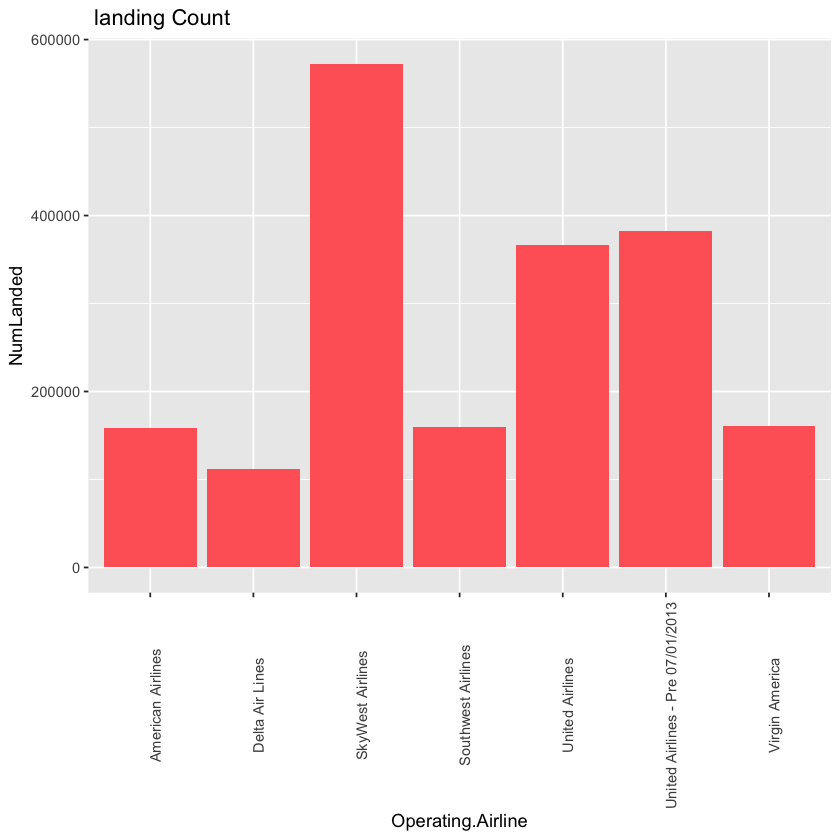

In [10]:
Land_R <- landings %>% group_by(Operating.Airline) %>% summarize (NumLanded = sum(as.numeric(Landing.Count))) %>% 
filter(NumLanded > 100000)

ggplot(Land_R, aes( x = Operating.Airline, y = NumLanded)) + geom_bar(stat = "identity", fill = "#FF6666") + ggtitle(" landing Count") +
theme(axis.text.x=element_text(size=rel(1), angle=90))

![](http://i.bnet.com/blogs/united_continental_new_logo.gif)
![](http://wayman.net/wp-content/uploads/2015/09/skywest-airline-logo-1-300x113.jpg)


## Explanation :
### The airplanes which has higher landing count in SFO are skywest Airlines and United Airlines

## 2.b Volume of Passengers arriving on Domestic and International flights

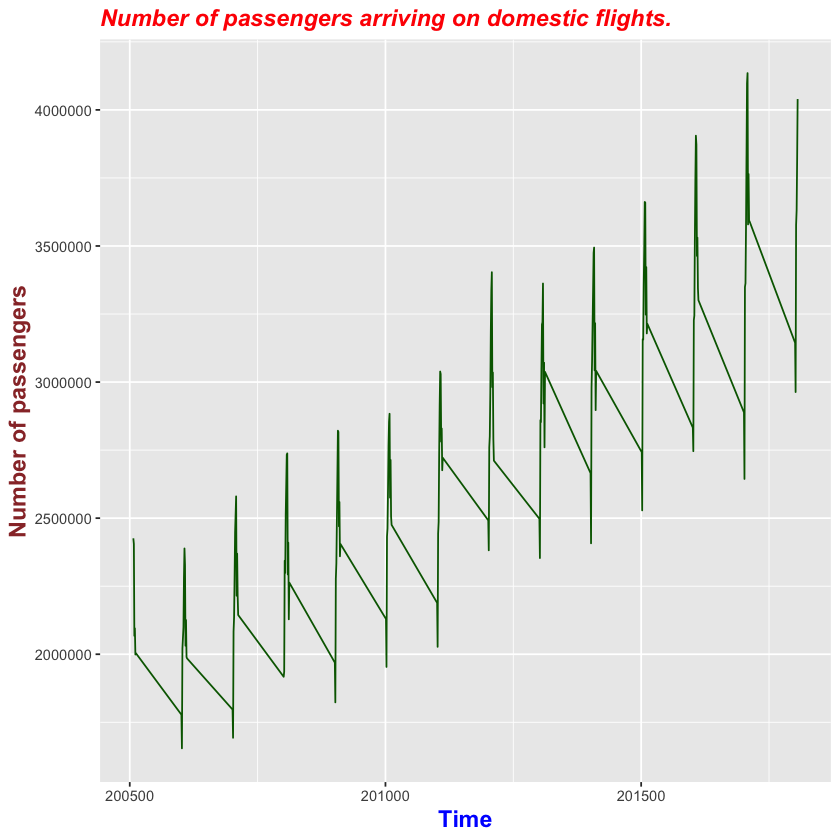

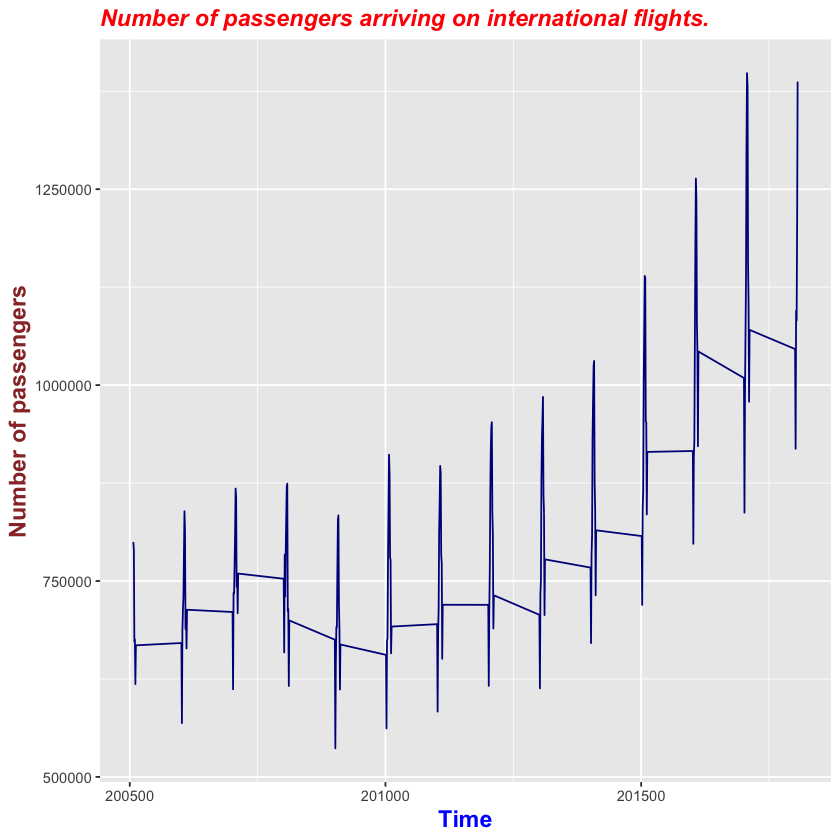

In [11]:
DomPopula <- passagers %>% filter(GEO.Summary == "Domestic") %>% group_by(Activity.Period) %>% summarise(NumOfPop = sum(Passenger.Count))

qplot(Activity.Period, NumOfPop, data = DomPopula, 
     geom = c("line"),colour = I("darkgreen"), xlab = "Time", ylab = "Number of passengers")+ ggtitle("Number of passengers arriving on domestic flights.") + theme(
plot.title = element_text(color="red", size=14, face="bold.italic"),
axis.title.x = element_text(color="blue", size=14, face="bold"),
axis.title.y = element_text(color="#993333", size=14, face="bold"))

InternaPopula <- passagers %>% filter (GEO.Summary == "International") %>% group_by(Activity.Period) %>% summarise(NumOfPop = sum(Passenger.Count))

qplot(Activity.Period, NumOfPop, data = InternaPopula,
     geom = c("line"), colour = I("darkblue"), xlab = "Time", ylab = "Number of passengers")+ggtitle("Number of passengers arriving on international flights.") + theme(
plot.title = element_text(color="red", size=14, face="bold.italic"),
axis.title.x = element_text(color="blue", size=14, face="bold"),
axis.title.y = element_text(color="#993333", size=14, face="bold"))

## 2ba. Domestic and International number of passengers.
### We filter out the data after 2017, and classify into domestic and international number of passengers.

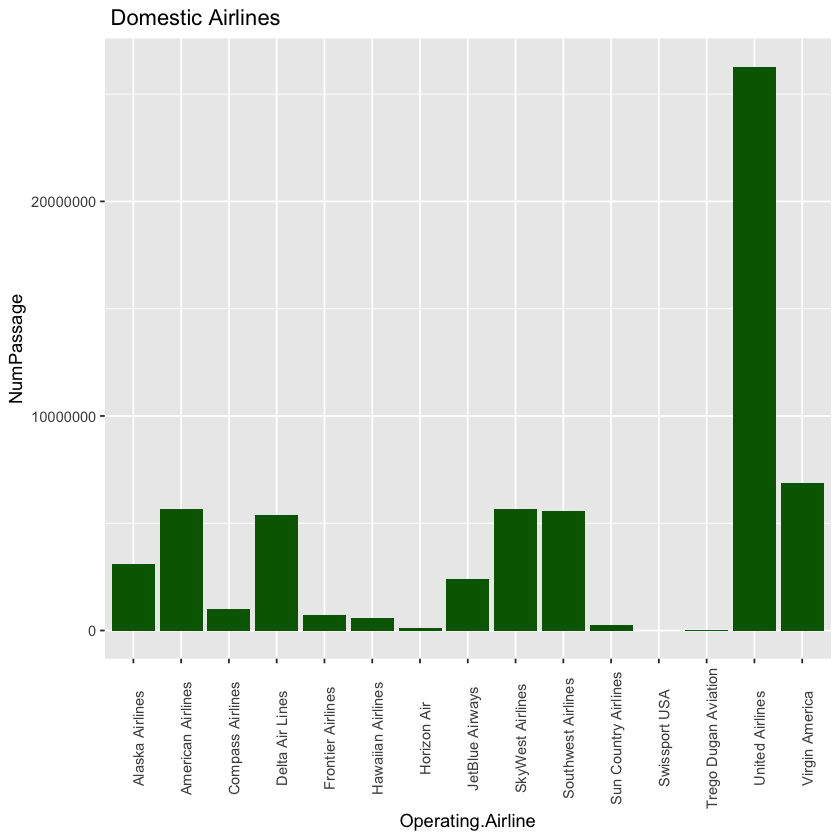

In [12]:
DLS <- passagers %>% filter(Activity.Period >"2017", GEO.Summary == "Domestic") %>% group_by(Operating.Airline) %>% 
summarize(NumPassage = sum(Passenger.Count)) #%>% filter (NumPassage > 735850)

ggplot(DLS, aes( x = Operating.Airline, y = NumPassage)) + geom_bar(stat = "identity", fill = "darkgreen") + ggtitle(" Domestic Airlines") +
theme(axis.text.x=element_text(size=rel(1), angle=90))

### Virgin-America

![](https://fm.cnbc.com/applications/cnbc.com/resources/img/editorial/2015/07/16/102840468-virgin-america.530x298.jpg?v=1515681854)


## Explanation: 
### In domestic airlines, Virgin America, United Airlines, and American Airlines have higer number of passengers.

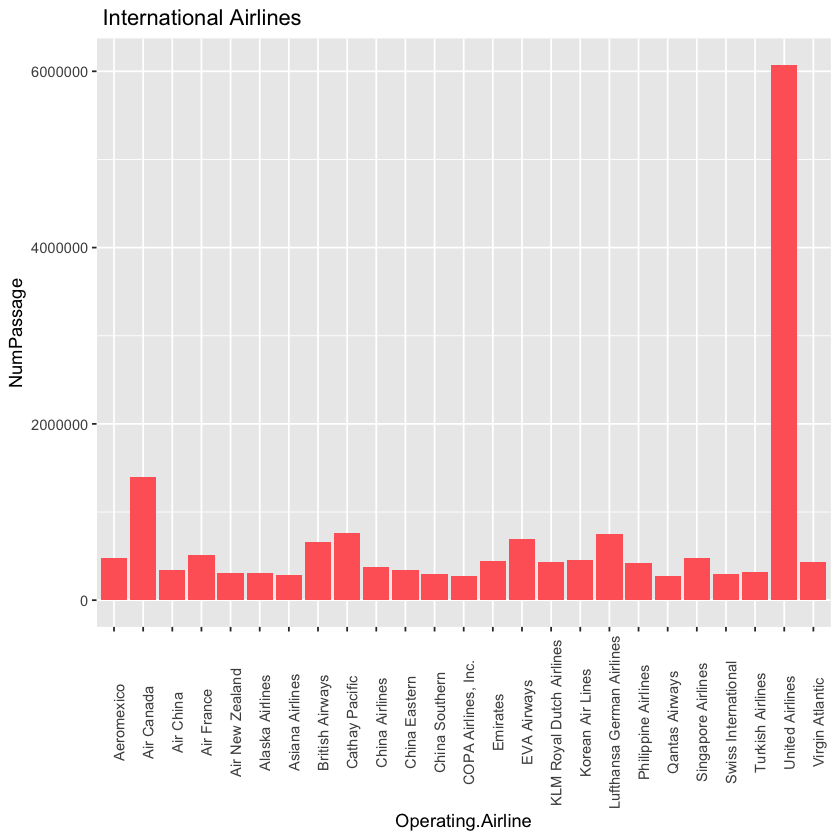

In [13]:
ILS <- passagers %>% filter(Activity.Period >"2017", GEO.Summary == "International") %>% group_by(Operating.Airline) %>% summarize(NumPassage =
                                                                                                  sum(Passenger.Count)) %>% filter (NumPassage > 250000)

ggplot(ILS, aes( x = Operating.Airline, y = NumPassage)) + geom_bar(stat = "identity", fill = "#FF6666") + ggtitle(" International Airlines") +
theme(axis.text.x=element_text(size=rel(1), angle=90))

### Air Canada
![](https://www.aircanada.com/content/dam/aircanada/portal/images/tiles/book/manage-bookings/tile50-flight.jpg)

## Explanation: 
### In international airlines, United Airlines, and Air Canada have higer number of passengers.

## Explanation:
### The tendency of numbers of passengers have been increasing from 2005 in domestic and international both. The domestic poplulation is over 4000000 and the international population is over 1250000.

## 2.c Type of Airplanes

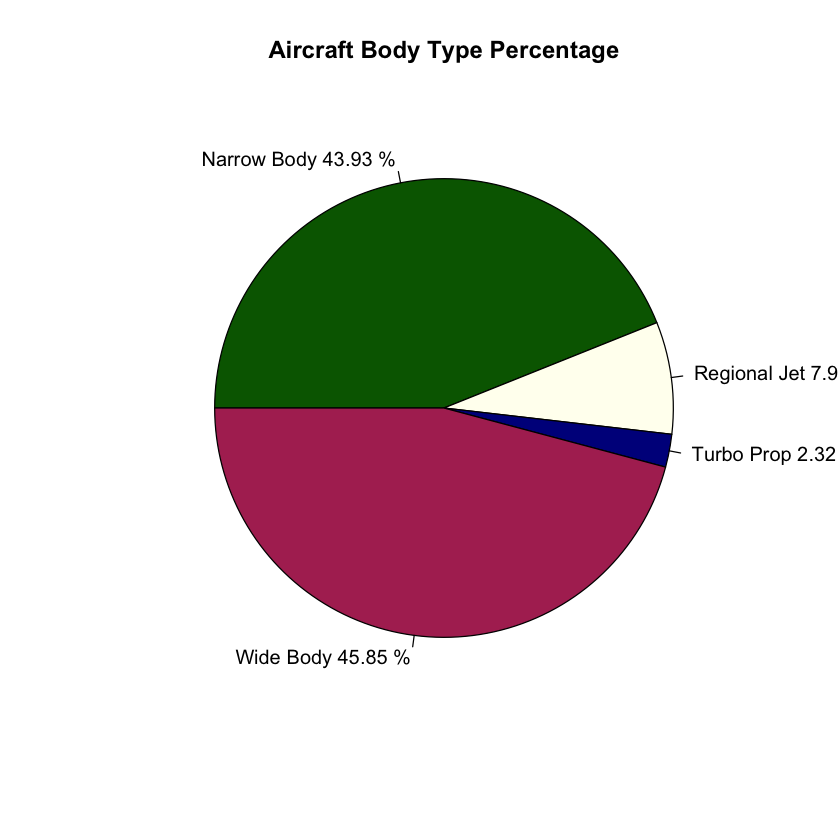

In [14]:
AircraftBoby <- landings %>% group_by(Aircraft.Body.Type) %>% summarize(num= n())


data=c(9597,1726,506,10017)
pct = (data/sum(data))*100
pct = round(pct,2)
    labels = c("Narrow Body", "Regional Jet", "Turbo Prop", 
                                 "Wide Body")
    labels = paste(labels,pct, "%")
            col = c("darkgreen","ivory", "darkblue", "maroon")
    pie(pct,col = col, radius = 0.8, init.angle = 180, clockwise = TRUE, 
    labels =labels, main = "Aircraft Body Type Percentage")


### Narrow-body
![](https://qph.fs.quoracdn.net/main-qimg-29d147082df5a55a322645f62bf61505-c)

### Wide-body
![](https://qph.fs.quoracdn.net/main-qimg-8f9b0b07436a25c19b559189b30ad733-c)
### Regional
![](http://aviationweek.com/site-files/aviationweek.com/files/uploads/2017/05/19/Paris2017_CRJ_Beauty_----.jpg)

### Turbo prop
![](https://centraljetcharter.com/images/turboprops-private-plane-interior.jpg)


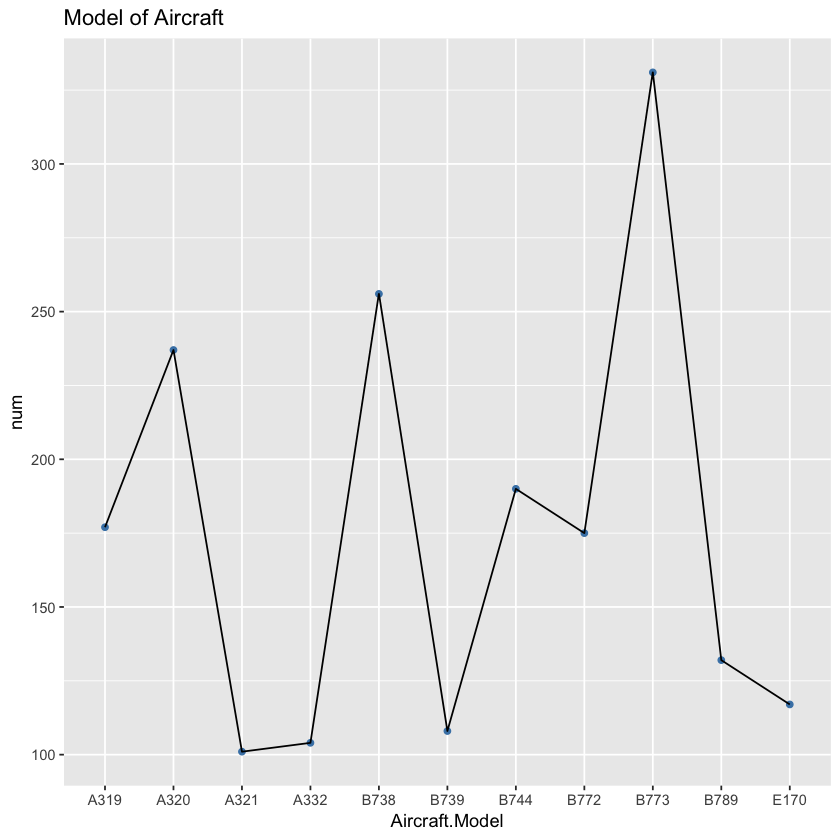

In [15]:
ModelBody <- landings %>% filter(Activity.Period >= "2017")%>% group_by(Aircraft.Model) %>% summarize (num = n()) %>% filter (num > 100)

ggplot(ModelBody, aes(x = Aircraft.Model, y = num, group = 1)) + ggtitle("Model of Aircraft")+
geom_point(colour="steelblue") + geom_line() +theme(axis.text.x=element_text(size=rel(1)))

### A320

![](https://mk0runwaygirl0t0gjwt.kinstacdn.com/wp-content/uploads/2015/03/A320_Vueling_take_off-800x415.jpg)

### B773

![](https://upload.wikimedia.org/wikipedia/commons/1/1b/Emirates%2C_A6-EGZ%2C_Boeing_777-31H_ER_%2824484029280%29.jpg)

### B733

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1d/Lufthansa_B733_D-ABEE.jpg/800px-Lufthansa_B733_D-ABEE.jpg)

## Explanation: 
### The types of airplanes from 2005 to 2018: wide body and narrow body are the most all common types in SFO. Both of them take up over 43 percent in the chart. In addition, the most all of model of aircrafts landed in SFO after 2017 are B773, B733, and A320.

## 2.d  Total Landed Weight Ranking

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


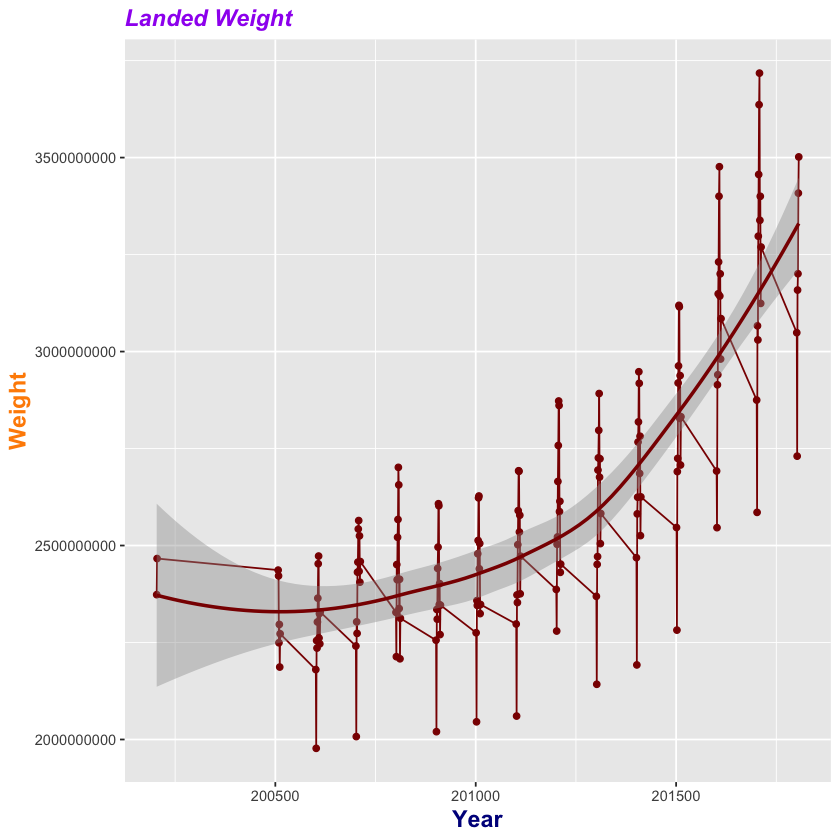

In [16]:
LandWeight <- landings %>%  group_by(Activity.Period) %>% summarise(LandedWeight = sum(as.numeric(Total.Landed.Weight)))

qplot(Activity.Period, LandedWeight, data = LandWeight, geom = c("point", "line", "smooth"), color = I("darkred"), xlab = "Year" , ylab = "Weight")+
ggtitle("Landed Weight") + theme(
plot.title = element_text(color="purple", size=14, face="bold.italic"),
axis.title.x = element_text(color="darkblue", size=14, face="bold"),
axis.title.y = element_text(color="darkorange", size=14, face="bold"))

## Explanation:
### From 2005 to 2018, the total of landed weight has increasing. In the data after 2018, the weight is over 3500000000 kg. it appeared that the number of passenager is enhance.

## 3.) ======================Join===========================
### Use merge function to union two dataset: Landing and Airlines with the name of airlines.

In [17]:
df <- merge (landings, Airlines[, c("Name","Country")] ,by.x = "Operating.Airline", by.y = "Name")

In [18]:
install.packages("ggrepel")
library("ggrepel")
library(tidyverse)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


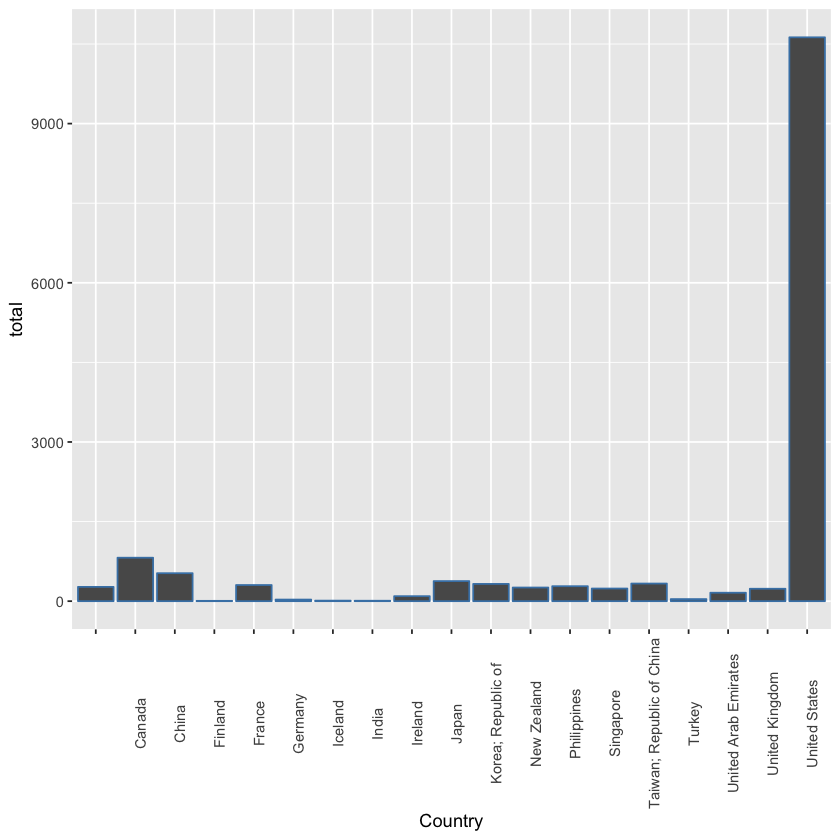

In [19]:
dfa <- df %>% group_by(Country) %>% summarize ("total" = n () )
ggplot(dfa) + geom_bar(stat = "identity", color = 'steelblue', aes(x = Country, y = total)) + theme(axis.text.x=element_text(size=rel(1), angle=90))

## Explanation:
### It appears that most all of airplanes companies are from United States. They are local companies.

## 4.) =======================Elite=============================

## 4.a Condition of Elite

### Our condition is the flight who has higher landing count.

### merging the dataset landings and airlines

In [20]:
m1 <- merge(x = landings, y = Airlines, by.x="Operating.Airline", by.y="Name")

head (m1)
names(m1)

Operating.Airline,Activity.Period,Operating.Airline.IATA.Code,Published.Airline,Published.Airline.IATA.Code,GEO.Summary,GEO.Region,Landing.Aircraft.Type,Aircraft.Body.Type,Aircraft.Manufacturer,⋯,Aircraft.Version,Landing.Count,Total.Landed.Weight,ICAO,IATA,CallSign,Country,Founded,Destinations,Fleet.Size
ABX Air,200510,GB,ABX Air,GB,Domestic,US,Freighter,Wide Body,Boeing,⋯,,12,3264000,ABX,GB,A BEX,United States,1980,183,31
ABX Air,201002,GB,ABX Air,GB,Domestic,US,Freighter,Wide Body,Boeing,⋯,-,58,15886000,ABX,GB,A BEX,United States,1980,183,31
ABX Air,200710,GB,ABX Air,GB,Domestic,US,Freighter,Wide Body,Boeing,⋯,,48,13584000,ABX,GB,A BEX,United States,1980,183,31
ABX Air,201211,GB,ABX Air,GB,Domestic,US,Freighter,Wide Body,Boeing,⋯,-,22,5984000,ABX,GB,A BEX,United States,1980,183,31
ABX Air,201204,GB,ABX Air,GB,Domestic,US,Freighter,Wide Body,Boeing,⋯,-,41,11196000,ABX,GB,A BEX,United States,1980,183,31
ABX Air,200702,GB,ABX Air,GB,Domestic,US,Freighter,Wide Body,Boeing,⋯,,44,12452000,ABX,GB,A BEX,United States,1980,183,31


[1] "Operating.Airline"           "Activity.Period"            
 [3] "Operating.Airline.IATA.Code" "Published.Airline"          
 [5] "Published.Airline.IATA.Code" "GEO.Summary"                
 [7] "GEO.Region"                  "Landing.Aircraft.Type"      
 [9] "Aircraft.Body.Type"          "Aircraft.Manufacturer"      
[11] "Aircraft.Model"              "Aircraft.Version"           
[13] "Landing.Count"               "Total.Landed.Weight"        
[15] "ICAO"                        "IATA"                       
[17] "CallSign"                    "Country"                    
[19] "Founded"                     "Destinations"               
[21] "Fleet.Size"

## 4b. merging the m1 dataset with countries 

In [21]:
m2 <- merge(x = m1, y = countries, by.y="Country")
head(m2, 20)
names(m2)
str(m2)

Country,Operating.Airline,Activity.Period,Operating.Airline.IATA.Code,Published.Airline,Published.Airline.IATA.Code,GEO.Summary,GEO.Region,Landing.Aircraft.Type,Aircraft.Body.Type,⋯,Phones..per.1000.,Arable....,Crops....,Other....,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Canada,Air Canada,200909,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,⋯,"552,2","4,96","0,02","95,02",,"10,78","7,8","0,022","0,294","0,684"
Canada,Air Canada,201310,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,⋯,"552,2","4,96","0,02","95,02",,"10,78","7,8","0,022","0,294","0,684"
Canada,Air Canada,200809,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,⋯,"552,2","4,96","0,02","95,02",,"10,78","7,8","0,022","0,294","0,684"
Canada,Air Canada,201310,AC,Air Canada,AC,International,Canada,Passenger,Regional Jet,⋯,"552,2","4,96","0,02","95,02",,"10,78","7,8","0,022","0,294","0,684"
Canada,Air Canada,201710,AC,Air Canada,AC,International,Canada,Passenger,Wide Body,⋯,"552,2","4,96","0,02","95,02",,"10,78","7,8","0,022","0,294","0,684"
Canada,Air Canada,201405,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,⋯,"552,2","4,96","0,02","95,02",,"10,78","7,8","0,022","0,294","0,684"
Canada,Air Canada,201601,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,⋯,"552,2","4,96","0,02","95,02",,"10,78","7,8","0,022","0,294","0,684"
Canada,Air Canada,200511,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,⋯,"552,2","4,96","0,02","95,02",,"10,78","7,8","0,022","0,294","0,684"
Canada,Air Canada,201508,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,⋯,"552,2","4,96","0,02","95,02",,"10,78","7,8","0,022","0,294","0,684"
Canada,Air Canada,201003,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,⋯,"552,2","4,96","0,02","95,02",,"10,78","7,8","0,022","0,294","0,684"


[1] "Country"                            "Operating.Airline"                 
 [3] "Activity.Period"                    "Operating.Airline.IATA.Code"       
 [5] "Published.Airline"                  "Published.Airline.IATA.Code"       
 [7] "GEO.Summary"                        "GEO.Region"                        
 [9] "Landing.Aircraft.Type"              "Aircraft.Body.Type"                
[11] "Aircraft.Manufacturer"              "Aircraft.Model"                    
[13] "Aircraft.Version"                   "Landing.Count"                     
[15] "Total.Landed.Weight"                "ICAO"                              
[17] "IATA"                               "CallSign"                          
[19] "Founded"                            "Destinations"                      
[21] "Fleet.Size"                         "Region"                            
[23] "Population"                         "Area..sq..mi.."                    
[25] "Pop..Density..per.sq..mi.."         "Coastline..coast.area.ratio."      
[27] "Net.migration"                      "Infant.mortality..per.1000.births."
[29] "GDP....per.capita."                 "Literacy...."                      
[31] "Phones..per.1000."                  "Arable...."                        
[33] "Crops...."                          "Other...."                         
[35] "Climate"                            "Birthrate"                         
[37] "Deathrate"                          "Agriculture"                       
[39] "Industry"                           "Service"

'data.frame':	14011 obs. of  40 variables:
 $ Country                           : Factor w/ 159 levels "","Afghanistan",..: 26 26 26 26 26 26 26 26 26 26 ...
 $ Operating.Airline                 : Factor w/ 114 levels "ABC Aerolineas S.A. de C.V. dba Interjet",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ Activity.Period                   : int  200909 201310 200809 201310 201710 201405 201601 200511 201508 201003 ...
 $ Operating.Airline.IATA.Code       : Factor w/ 100 levels "","2Q","4O","4T",..: 12 12 12 12 12 12 12 12 12 12 ...
 $ Published.Airline                 : Factor w/ 103 levels "ABC Aerolineas S.A. de C.V. dba Interjet",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ Published.Airline.IATA.Code       : Factor w/ 91 levels "","2Q","4O","4T",..: 12 12 12 12 12 12 12 12 12 12 ...
 $ GEO.Summary                       : Factor w/ 2 levels "Domestic","International": 2 2 2 2 2 2 2 2 2 2 ...
 $ GEO.Region                        : Factor w/ 10 levels "Asia","Australia / Oceania",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ La

In [22]:
summary(m2)

          Country              Operating.Airline Activity.Period 
 United States:10626   United Airlines  :2572    Min.   :200204  
 Canada       :  819   Alaska Airlines  :1334    1st Qu.:200904  
 China        :  527   Delta Air Lines  :1288    Median :201211  
 Japan        :  378   SkyWest Airlines :1199    Mean   :201206  
 France       :  304   American Airlines: 849    3rd Qu.:201510  
 Philippines  :  282   Air Canada       : 819    Max.   :201806  
 (Other)      : 1075   (Other)          :5950                    
 Operating.Airline.IATA.Code         Published.Airline
 UA     :2572                United Airlines  :2937   
 AS     :1334                Delta Air Lines  :1656   
 DL     :1288                Alaska Airlines  :1480   
 OO     :1199                American Airlines: 911   
 AA     : 849                Air Canada       : 819   
 AC     : 819                US Airways       : 703   
 (Other):5950                (Other)          :5505   
 Published.Airline.IATA.Code    

## 4c. Using the function to print out the flight information : Airline, time, flight, Landing count.

In [23]:
for (row in 1:nrow(m2)) {
    if ( m2[row,c("Landing.Count")] >1950 & m2[row, c("Landing.Aircraft.Type")] == "Passenger" )  {
        print ("-----------------")
        message <- paste("Airline: ", m2[row, c("Operating.Airline")])
        print(message)
        message <- paste("Time: ", m2[row, c("Activity.Period")])
        print(message)
        message <- paste("flight: ", m2[row, c("GEO.Summary")])
        print(message)
        message <- paste("Landing Count: ", m2[row, c("Landing.Count")])
        print(message)
    }
}

[1] "-----------------"
[1] "Airline:  SkyWest Airlines"
[1] "Time:  200810"
[1] "flight:  Domestic"
[1] "Landing Count:  2028"
[1] "-----------------"
[1] "Airline:  SkyWest Airlines"
[1] "Time:  200903"
[1] "flight:  Domestic"
[1] "Landing Count:  2016"
[1] "-----------------"
[1] "Airline:  SkyWest Airlines"
[1] "Time:  200706"
[1] "flight:  Domestic"
[1] "Landing Count:  2129"
[1] "-----------------"
[1] "Airline:  SkyWest Airlines"
[1] "Time:  200701"
[1] "flight:  Domestic"
[1] "Landing Count:  1969"
[1] "-----------------"
[1] "Airline:  SkyWest Airlines"
[1] "Time:  200707"
[1] "flight:  Domestic"
[1] "Landing Count:  2192"
[1] "-----------------"
[1] "Airline:  SkyWest Airlines"
[1] "Time:  200704"
[1] "flight:  Domestic"
[1] "Landing Count:  1979"
[1] "-----------------"
[1] "Airline:  SkyWest Airlines"
[1] "Time:  200608"
[1] "flight:  Domestic"
[1] "Landing Count:  2094"
[1] "-----------------"
[1] "Airline:  SkyWest Airlines"
[1] "Time:  200605"
[1] "flight:  Domestic"
[1]

# ====================Summary=====================

### First we got the four dataset, and we explored in four objectives. The number of passages have been increasing from 2005. Until 2018, the number of passengers in international flights is over 1250000, and in domestic flights is over 4000000. And also, the types of aircrafts are concentrating on Narrow body and Wide body. They take up 45 percent each. In addition, after 2017, the model of aircraft which is used most are A320, B773, and B733. Along with increasing number of passengers, the landed weight has been increasing from 2005 as well. Moreover, we make a condition of elite flights which is the flight who has over1950 times to land. We can see there is 29 flights match our condition.

# =================Recommendations=================

### The report shows us that from 2005 to 2018, because the numbers of passengers is increasing, the higher landed weight come with. San Mateo County should consider about the quality of airport runway. As I know, the SFO is builded on the land which is on the sea. We should check the maximum load capacity is enough or not. Also, even though SFO airport is one of big airport in west of America, the most all of flight is domestic flights. We should expand the domestic terminals first. In addition, along with the expanding terminal, we should improve the transportation between the terminals and organize the area of vendors. 